# Data Analysis for Physics and Astronomy
## Sommersemster 2024 
# Assignment 1

Due: **10:00 30. April 2024**

Discussion: **12:00 30. April 2024**

**Online submission** at via github classroom  

# 1. Sampling [70 points]

The Behavioral Risk Factor Surveillance System (BRFSS) is an annual telephone survey of 350,000 people in the United States. As its
name implies, the BRFSS is designed to identify risk factors in the adult population and report emerging health trends. For example,
respondents are asked about their diet and weekly physical activity, their HIV/AIDS status, possible tobacco use, and even their level of
healthcare coverage. The BRFSS Web site (http://www.cdc.gov/brfss) contains a complete description of the survey, including the research
questions that motivate the study and many interesting results derived from the data.

In [ ]:
#%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib'

## Visually inspect the ASCII data file from the Data/ directory
The data file is zipped: `cdbrfss1999.zip`. Unzip it and look at it. It is in ASCII format.

The file `Codebook99.rtf` contains a detailed explanation of the individual data entries. Use the
Cookbook to understand the data columns that you are working on in this problem.

In [1]:
import zipfile
import os

cdbrfss1999 = "Data/cdbrfss1999.zip"
with zipfile.ZipFile(cdbrfss1999, 'r') as zip_ref:
    zip_ref.extractall('cdbrfss1999_unzipped')

#with open('cdbrfss1999_unzipped/cdbrfss1999.csv', 'r') as file:
 #   print(file.read())



## Large data

The dataset contains 159989 entries.

**a.** Take a sample of 30000 from this dataset and export it to an ASCII file. Make sure that your method allows to draw more than one sample from the population. **[10 points]**

In [2]:
%pip install --upgrade pip
%pip install pandas
import pandas as pd

cdbrfss = pd.read_csv("Data/cdbrfss1999.zip", compression='zip') # TODO: import the file cdbrfss1999.csv with the Pandas command pd.read_csv . This creates the DataFrame cdbrfss. You can read directly from the zip file with the compression='zip' option.
print(cdbrfss.head())

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


/tmp/ipykernel_2130/3874511820.py:5: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  cdbrfss = pd.read_csv("Data/cdbrfss1999.zip", compression='zip') # TODO: import the file cdbrfss1999.csv with the Pandas command pd.read_csv . This creates the DataFrame cdbrfss. You can read directly from the zip file with the compression='zip' option.


   STATE  GEOSTR  DENSTR    PSU  RECORD  IMONTH   IDAY   IYEAR  INTVID   \
0      1       1       1  10012       1        1     19    1999      40   
1      1       1       1  10013       1        1     12    1999      33   
2      1       1       1  10034       1        1     16    1999      45   
3      1       1       1  10035       1        1     15    1999      45   
4      1       1       1  10039       1        1     16    1999       0   

   Unnamed: 9  ...  Unnamed: 272  Unnamed: 273  Unnamed: 274  Unnamed: 275  \
0         NaN  ...             1             9           1.0             1   
1         NaN  ...             1             9           2.0             1   
2         NaN  ...             1             9           1.0             1   
3         NaN  ...             1             9           1.0             1   
4         NaN  ...             1             9           1.0             1   

   Unnamed: 276  Unnamed: 277  Unnamed: 278  Unnamed: 279  Unnamed: 280  \
0    

Look up the `DataFrame.sample()` method here: [DOCUMENTATION](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html#pandas.DataFrame.sample)

In [8]:
# TODO: Pandas DataFrames have the method .sample associated to randomly sample from the list. 

import pandas as pd
cdbrfss = pd.read_csv("Data/cdbrfss1999.zip", compression='zip', low_memory=False)
sample_30000=cdbrfss.sample(n=30000, random_state=1)

print(sample_30000.head())
sample_30000.to_csv("Data/sample_30000.txt", index=False, sep='\t')


        STATE  GEOSTR  DENSTR     PSU  RECORD  IMONTH   IDAY   IYEAR  INTVID   \
143787     51      11       1    7449       1        6     17    1999      D8   
34670      16       2       1  120774       1       12      7    1999       5   
111610     41       1       1   21240       1        2     12    1999      87   
153124     55       4       1    8520       1       10      2    1999      F9   
152667     55       1       1    8376       1       10      4    1999      G4   

        Unnamed: 9  ...  Unnamed: 272  Unnamed: 273  Unnamed: 274  \
143787         NaN  ...             1             1           3.0   
34670          NaN  ...             1             9           1.0   
111610         NaN  ...             1             9           1.0   
153124         NaN  ...             2             9           1.0   
152667         NaN  ...             2             9           1.0   

        Unnamed: 275  Unnamed: 276  Unnamed: 277  Unnamed: 278  Unnamed: 279  \
143787            

**b.** Discuss your method to do so. Is your sampling a "good sample" in the sense that it is representative for the larger "population"? **[5 points]**


Bevölkerungsdichte hat nahezu immer den Wert 1. Demnach ist das Sample in dieser Hinsicht keine repräsentative Stichprobe, da fast nur Daten von Personen aus städtischen Regionen vorkommen.


## Large columns

Each case in the dataset can have up to 241 variables. Each one of these variables corresponds to a question that was asked in the survey. For example, for **genhlth**, respondents were asked to evaluate their general health, responding either excellent, very good, good, fair or poor. The **exerany** variable indicates whether the respondent exercised in the past month (1) or did not (0). Likewise, **hlthplan** indicates whether the respondent had some form of health coverage (1) or did not (0). The **smoke100** variable indicates whether the respondent had smoked at least 100 cigarettes in her lifetime. The other variables record the respondent’s height in inches (**hti**) and feet (**htf**), **weight** in pounds as well as their desired weight, **wtdesire**, **age** in years, and **sex**.

**a.** Locate the columns corresponding to the variables **genhlth**, **exerany**, **htf**, **hti**, **smoke100**, **weight**, **wtdesire**, **age**, and **sex**.

Any reasonable method of isolating the columns and saving the subsample is accepted. For `pandas`, the list of column names is an attribute of the `DataFrame` object, and where columns without a column name are given the title 'Unnamed: [index]'.

In [11]:
import pandas as pd
cdbrfss = pd.read_csv("Data/cdbrfss1999.zip", compression='zip', low_memory=False)

cdbrfss_columns=["GENHLTH", "EXERANY", "HTF", "HTI", "SMOKE100", "WEIGHT", "WTDESIRE", "AGE", "SEX"]
list_columns = cdbrfss[cdbrfss_columns]
print(list_columns.head())


   GENHLTH  EXERANY  HTF  HTI  SMOKE100  WEIGHT  WTDESIRE  AGE  SEX
0        3      NaN    5    6         1     130       NaN   73    2
1        3      NaN    5    8         2     160       NaN   59    2
2        2      NaN    5    2         2     118       NaN   31    2
3        1      NaN    5    7         2     127       NaN   27    2
4        1      NaN    5    8         1     175       NaN   49    2


In [ ]:
cdbrfss.columns

Index(['STATE', 'GEOSTR', 'DENSTR', 'PSU', 'RECORD', 'IMONTH ', 'IDAY ',
       'IYEAR ', 'INTVID ', 'Unnamed: 9',
       ...
       'Unnamed: 272', 'Unnamed: 273', 'Unnamed: 274', 'Unnamed: 275',
       'Unnamed: 276', 'Unnamed: 277', 'Unnamed: 278', 'Unnamed: 279',
       'Unnamed: 280', 'Unnamed: 281'],
      dtype='object', length=282)

In [ ]:
cdbrfss.columns.values

array(['STATE', 'GEOSTR', 'DENSTR', 'PSU', 'RECORD', 'IMONTH ', 'IDAY ',
       'IYEAR ', 'INTVID ', 'Unnamed: 9', 'DISPCODE', 'WINDDOWN', 'SEQNO',
       'NATTMPTS', 'NRECSEL', 'NRECSTR', 'BPSELWT', 'WAKSS1S2',
       'NUMADULT', 'NUMMEN', 'NUMWOMEN', 'GENHLTH', 'PHYSHLTH',
       'MENTHLTH', 'POORHLTH', 'HLTHPLAN', 'MEDICAR2', 'TYPCOVR1',
       'TYPCOVR2', 'NOCOV12', 'PASTPLAN', 'MEDCOST', 'CHECKUP', 'BPTAKE',
       'BPHIGH', 'HIGHGT1', 'BLOODCHO', 'CHOLCHK', 'TOLDHI', 'DIABETES',
       'LASTDEN2', 'RMVTEETH', 'DENCLEAN', 'SUNBURN', 'NUMBURN',
       'SMOKE100', 'SMOKEDAY', 'SMOKENUM', 'SMOKNM30', 'STOPSMOK',
       'LASTSMOK', 'DRINKANY', 'ALCOHOL', 'NALCOCC', 'DRINKGE5',
       'DRINKDRI', 'AGE', 'ORACE', 'HISPANIC', 'MARITAL', 'CHLD04',
       'CHLD0512', 'CHLD1317', 'EDUCA', 'EMPLOY', 'INCOME2', 'WEIGHT',
       'HTF', 'HTI', 'CTYCODE', 'NUMHHOLD', 'NUMPHONS', 'SEX', 'HADMAM',
       'HOWLONG', 'WHYDONE', 'PROFEXAM', 'LENGEXAM', 'REASEXAM', 'HADPAP',
       'LASTPAP', 'WHYPAP'

In [ ]:
# TODO: understand what the following commands do
columns = {"GENHLTH":22, "EXERANY":196, "HLTHPLAN":26, "SMOKE100":46, "HTF":68, "HTI":69, "WEIGHT":67, "WTDESIRE":210, "AGE":57, "SEX":73}
desired_column_names = [key for key, value in columns.items()]

**b.** Reduce your sample to include only these variables and export it to an ASCII file. **[2 points]**

- Use the method `DataFrame.loc` [DOCUMENTATION](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html) to select the columns you want.

- Use the method `DataFrame.to_csv` [DOCUMENTATION](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html) to export the subset to a CSV file.

In [3]:
import pandas as pd
cdbrfss = pd.read_csv("Data/cdbrfss1999.zip", compression='zip', low_memory=False)
cdbrfss_columns=["GENHLTH", "EXERANY", "HTF", "HTI", "SMOKE100", "WEIGHT", "WTDESIRE", "AGE", "SEX"]
sample_30000_columns=cdbrfss.sample(n=30000, random_state=1).loc[:, cdbrfss_columns]

print(sample_30000_columns.head())
sample_30000_columns.to_csv("Data/sample_30000_columns.txt", index=False, sep='\t')

        GENHLTH  EXERANY  HTF  HTI  SMOKE100  WEIGHT  WTDESIRE  AGE  SEX
143787        2      1.0    5    6         2     140     134.0   19    2
34670         2      NaN    5    8         1     140       NaN   30    2
111610        1      NaN    5    7         1     150       NaN   52    2
153124        3      NaN    5   10         2     204       NaN   51    1
152667        2      NaN    5    4         2     180       NaN   72    2


**c.** How many cases and how many variables are there in your sample? **[2 points]**

- (a) 9 cases; 30,000 variables

- (b) 8 cases; 30,000 variables

- (c) 30,000 cases; 9 variables

- (d) 159,989 cases; 10 variables

Antwort: (c) Es sind 30.000 Fälle und 9 Variablen in der Liste.

**d.** What type of variable is **genhlth**? **[2 points]**

- (a) numerical, continuous

- (b) numerical, discrete

- (c) categorical (not ordinal)

- (d) categorical, ordinal

Antwort: (d)

**e.** What type of variable is **weight**? **[2 points]**

- (a) numerical, continuous

 - (b) numerical, discrete

 - (c) categorical (not ordinal)

 - (d) categorical, ordinal

 Antwort: (b) Obwohl Gewicht eigentlich in kontinuierlichen Werten angegeben wird, ist das Gewicht der Proband_innen (WEIGHT) hier mit diskreten Werten angegeben.

**f.** What type of variable is **smoke100**? **[2 points]**

 - (a) numerical, continuous
 
 - (b) numerical, discrete
 
 - (c) categorical (not ordinal)
 
 - (d) categorical, ordinal

 Antwort: (c)

## One Bar chart

Take all **genhlth** entries from your sample and draw a bar chart to visualize how the cases are distributed across the possible categories. Convert the numerical encoding to their represetations, e.g. 1 -> "Excellent". Check the data cookbook for details. **[10 points]**

- You can use `DataFrame.value_counts` to return the distribution counts. [DOCUMENTATION](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html)

- You can use `DataFrame.plot` to easily plot a Pandas Series or DataFrame. [DOCUMENTATION](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

Label your axes!


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


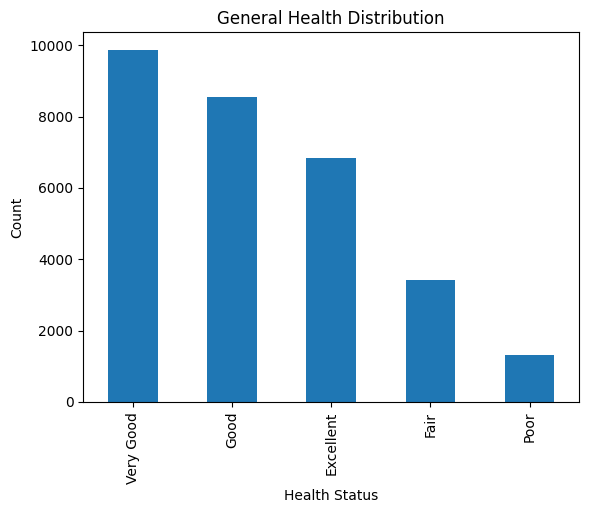

In [15]:
import pandas as pd
%pip install matplotlib
import matplotlib.pyplot as plt


data_frame = pd.read_csv("Data/sample_30000_columns.txt", sep="\t")
genhlth_mapping = {1: "Excellent", 2: "Very Good", 3: "Good", 4: "Fair", 5: "Poor"}

data_frame['GENHLTH'] = data_frame['GENHLTH'].map(genhlth_mapping)

genhlth_counts=data_frame['GENHLTH'].value_counts()

genhlth_counts.plot(kind='bar', title='General Health Distribution', xlabel='Health Status', ylabel='Count')

plt.show()

## Two Bar Charts

Combine the **smoke100** with the **genhlth** entries from your sample and draw __TWO__ bar charts, one showing the health of the smokers and a second one showing the health of the non-smokers. **[15 points]**

## BMI

Next let’s consider a new variable **bmi** that doesn’t show up directly in this data set: Body Mass Index (BMI).  **[20 points]**

BMI is a weight to height ratio and can be calculated as.

$$  \mathrm{BMI} = \frac{\mathrm{weight(lb)}}{\mathrm{height(in)}^2} * 703$$

703 is the approximate conversion factor to change units to metric (meters and kilograms)
from imperial (inches and pounds). Compute the bmi for each case in your sample and add it to
the sample (e.g. as additional column). Visualize the distribution of the BMI in your sample.

**ATTENTION**: Remember, that the height was given in feet and inches separately. make sure
to compute the total height in inches! 

Look up the Cookbook definition. Note that the values in the height columns may have special values indicating invalid entries. E.g. 777 corresponds to an unknown or uincertain height in inches and 999 corresponds to a refused answer. Similar  issues arise with the height in feet numbers. Make sure to clean your data from these invalid entries. 

**HINT** You can use the `DataFrame.isin` method ( [DOCUMENTATION](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html)) together with the logical NOT operator `~` to only select contents from a list that are not in a list of values. Don't forget to convert feet to inches. The units package helps: 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


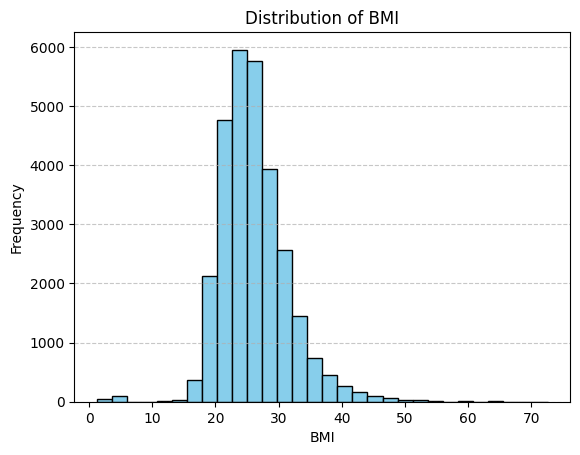

In [22]:
#(1 * u.imperial.foot).to(u.imperial.inch).value

# Installieren Sie die Bibliothek striprtf, falls noch nicht geschehen
#!pip install striprtf

#from striprtf.striprtf import rtf_to_text

# Pfad zur RTF-Datei
#rtf_file_path = "Data/Codebook_99.rtf"

# RTF-Datei lesen und entschlüsseln
#with open(rtf_file_path, "r", encoding="utf-8") as file:
 #   rtf_content = file.read()

# RTF-Inhalt in lesbaren Text umwandeln
#plain_text = rtf_to_text(rtf_content)

# Entschlüsselten Text anzeigen
#print(plain_text)

# Optional: Entschlüsselten Text in eine neue Datei speichern
#with open("Codebook_99_decoded.txt", "w", encoding="utf-8") as output_file:
    #output_file.write(plain_text)


import pandas as pd
%pip install matplotlib
import matplotlib.pyplot as plt

# Datei laden
file_path = "Data/sample_30000_columns.txt"
data = pd.read_csv(file_path, sep='\t')

#Werte filtern
invalid_values= [777,999]
data=data[~data["HTF"].isin(invalid_values)]
data=data[~data["HTI"].isin(invalid_values)]
data = data[~data["WEIGHT"].isin(invalid_values)]

data["HEIGHT_IN_INCHES"] = data["HTF"] * 12 + data["HTI"]  # Höhe in Zoll berechnen
data["BMI"] = (data["WEIGHT"] / (data["HEIGHT_IN_INCHES"] ** 2)) * 703

# Verteilung des BMI visualisieren
plt.hist(data["BMI"], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Optional: Daten mit BMI speichern
data.to_csv("Data/sample_30000_with_bmi.txt", sep='\t', index=False)






# 2. Multi-Dimensional Visualization [30 Points]

There are many different possibilities to visualize data. In this exercise you should select a particular
suitable way to visualize the provided data sets. Think about what information you want to relay and
what method works best - be creative (especially for the high-dimensional data.

The directory Data/ contains all data files for this problem in CSV-format.

Here is a brief example on how to plot data from a Pandas dataframe.

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 

Remember that Pandas allows to plot data very easily ([DOCUMENTATION](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)):

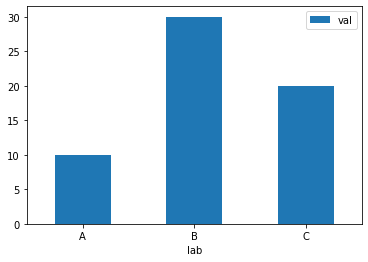

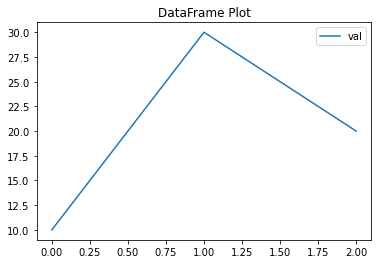

In [ ]:
df = pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})

ax = df.plot(kind='bar', x='lab', y='val', rot=0)

ax = df.plot(title="DataFrame Plot")

## 1-D data

Load the data in `Data/DATA-Exercise1-1D.csv`.

Show the results of 1000 coin tosses (head "H" or tail "T").  **[5 points]**

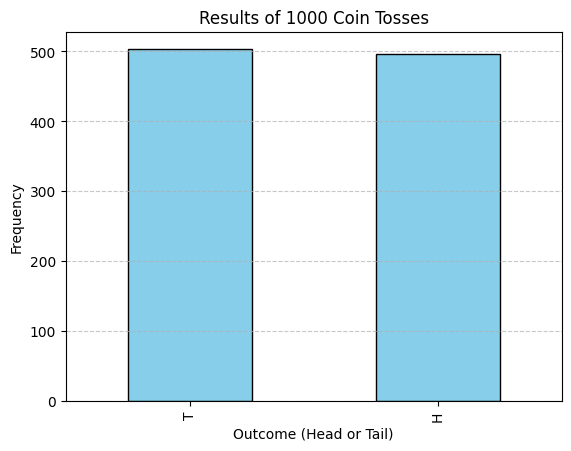

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Datei laden
file_path = "Data/DATA-Exercise1-1D.csv"
data = pd.read_csv(file_path)

# Werte zählen (z. B. Häufigkeit von "H" und "T")
value_counts = data.value_counts()

# DataFrame aus den Zählwerten erstellen
df = value_counts.reset_index()
df.columns = ['Outcome', 'Frequency']

# Balkendiagramm mit pd.DataFrame.plot() erstellen
ax = df.plot(kind='bar', x='Outcome', y='Frequency', color='skyblue', edgecolor='black', legend=False)

# Achsen beschriften und Titel hinzufügen
ax.set_title("Results of 1000 Coin Tosses")
ax.set_xlabel("Outcome (Head or Tail)")
ax.set_ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Diagramm anzeigen
plt.show()


## 2-D data

Load the data in `Data/DATA-Exercise1-2D.csv`.

Plot the world population since 10 000 B.C.  **[5 points]**

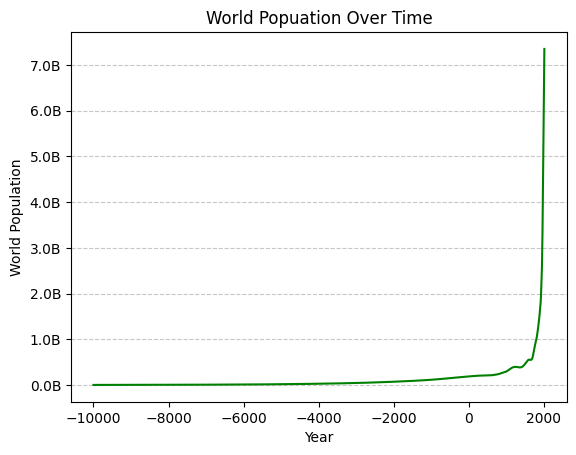

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter

# Datei laden
file_path = "Data/DATA-Exercise1-2D.csv"
data = pd.read_csv(file_path)


def billions_formatter(x, pos):
    return f'{x / 1e9:.1f}B'

# Balkendiagramm mit pd.DataFrame.plot() erstellen
ax = data.plot(kind='line', x='year', y='World Population (Spline Interpolation until 1950) (https://ourworldindata.org/world-population-growth/)', color='green', legend=False)

# Achsen beschriften und Titel hinzufügen
ax.set_title("World Popuation Over Time")
ax.set_xlabel("Year")
ax.set_ylabel("World Population")
ax.yaxis.set_major_formatter(FuncFormatter(billions_formatter))
#plt.ticklabel_format(style='plain', axis='y')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Diagramm anzeigen
plt.show()

## 3-D data

Load the data in `Data/DATA-Exercise1-3D.csv`.

Display the intensity map (using the columns x, y, and intensity).  **[5 points]**

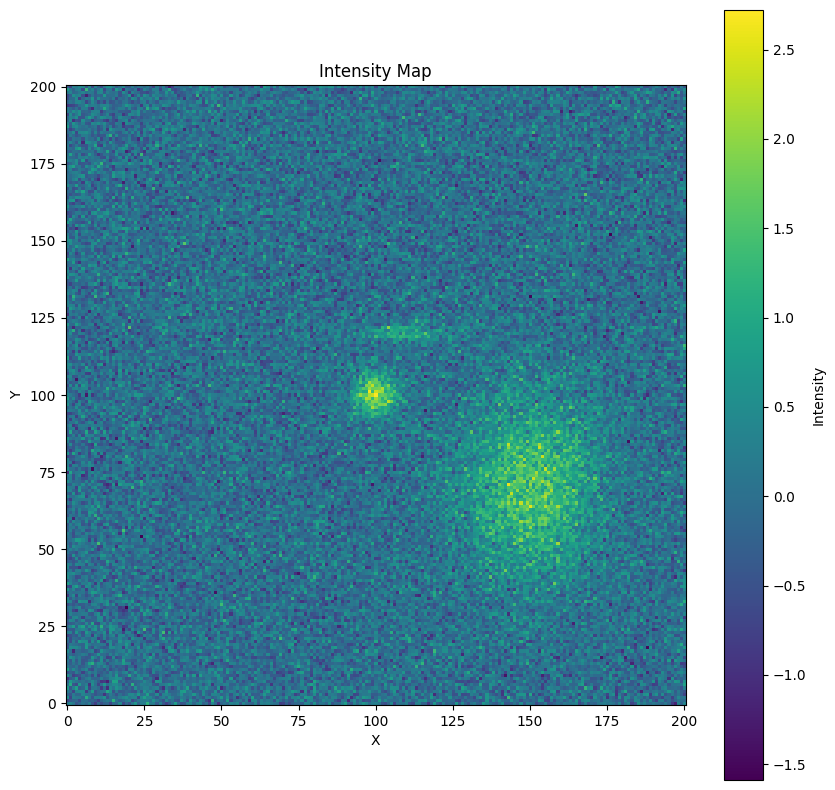

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Datei laden und Spaltennamen manuell festlegen
file_path = "Data/DATA-Exercise1-3D.csv"
data = pd.read_csv(file_path, header=None, names=["x", "y", "intensity"])

# Überprüfen der Datenstruktur
#print(data.head())

# Pivot-Tabelle erstellen, um die Daten für die Heatmap zu strukturieren
heatmap_data = data.pivot(index='y', columns='x', values='intensity')

# Heatmap erstellen
plt.figure(figsize=(10, 10))
plt.imshow(heatmap_data, cmap='viridis', origin='lower', aspect='equal', alpha=1)

# Achsen beschriften
plt.title("Intensity Map")
plt.xlabel("X")
plt.ylabel("Y")

# Farbskala hinzufügen
plt.colorbar(label="Intensity")

# Diagramm anzeigen
plt.show()

## 4-D data

Load the data in `Data/DATA-Exercise1-3D.csv`.

How will you show the volume properties (using columns x, y, z, and value)  **[5 points]**

ValueError: Index contains duplicate entries, cannot reshape

## 5-D data

Load the data in `Data/DATA-Exercise1-4D.csv`.

Represent this table with columns "Country", "PovertyFraction", "GDPPerCapita $", "MilitaryExpenditureFraction", "Population". **[5 points]**

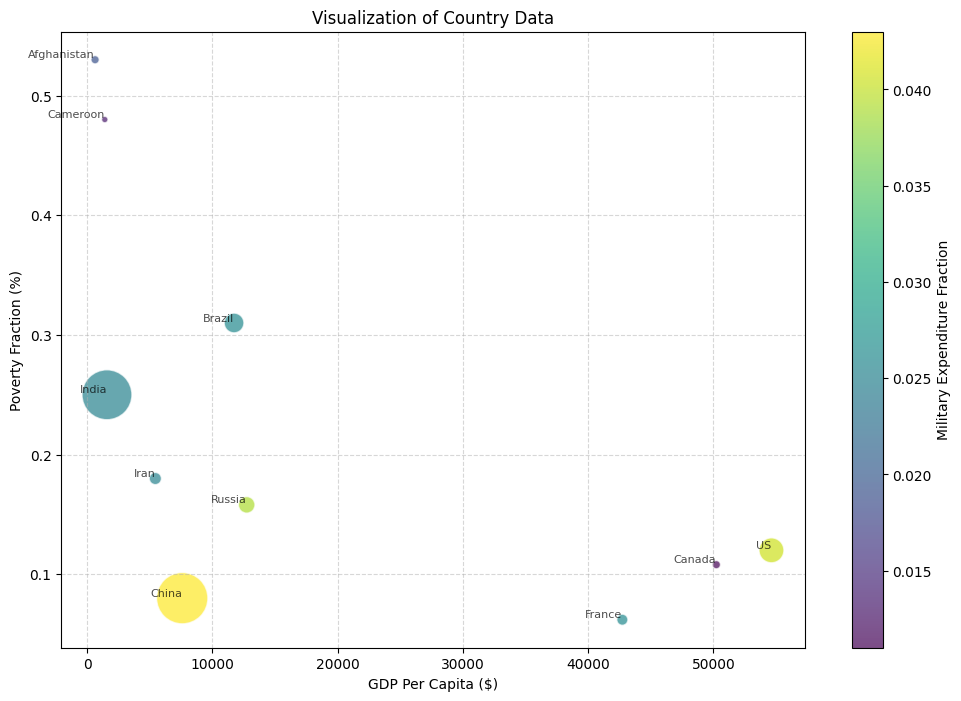

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Datei laden und Spaltennamen festlegen
file_path = "Data/DATA-Exercise1-5D.csv"
data = pd.read_csv(file_path, header=0, names=["Country", "PovertyFraction", "GDPPerCapita", "MilitaryExpenditureFraction", "Population"])

# Streudiagramm erstellen
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    data["GDPPerCapita"],               # x-Achse: GDP pro Kopf
    data["PovertyFraction"],           # y-Achse: Armutsanteil
    s=data["Population"] / 1e6,        # Blasengröße: Bevölkerung (skaliert)
    c=data["MilitaryExpenditureFraction"],  # Farbe: Militärausgabenanteil
    cmap="viridis",                    # Farbskala
    alpha=0.7,                         # Transparenz
    edgecolors="w"                     # Randfarbe der Punkte
)

# Ländernamen als Beschriftungen hinzufügen
for i, row in data.iterrows():
    plt.text(
        row["GDPPerCapita"], 
        row["PovertyFraction"], 
        row["Country"], 
        fontsize=8,                     # Schriftgröße
        ha='right',                     # Horizontale Ausrichtung
        va='bottom',                    # Vertikale Ausrichtung
        alpha=0.7                       # Transparenz
    )

# Farbskala hinzufügen
cbar = plt.colorbar(scatter)
cbar.set_label("Military Expenditure Fraction")

# Achsen beschriften und Titel hinzufügen
plt.title("Visualization of Country Data")
plt.xlabel("GDP Per Capita ($)")
plt.ylabel("Poverty Fraction (%)")
plt.grid(True, linestyle="--", alpha=0.5)

# Diagramm anzeigen
plt.show()



## 6-D data

Load the data in `Data/DATA-Exercise1-6D.csv`.

Find a way to visually represent the data (with columns x, y, z, size, val, direction angle).  **[5 points]**